##  <span style="color:blue">Exercise 3 - Driver file </span>
## <span style="color:blue">Computer Vision - Fall 2020


**Lecturer:** Prof. Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Sybmission date: 11.1.2021**



In this exercise you will practice working with videos, and simple segmentations.

## Submission guidelines:

1. Your zip file should include the following files only:
    - ex2-driver.ipynb  **Or**  ex2-driver.py 
    - ex2_ID_ID.doc  **Or**  ex2_ID_ID.pdf
2. The results you are asked to display and the open questions should be answered in a doc/pdf file. 
   (Don't add the python code to that file.)
4. You may use any IDE  (e.g., Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the file 'ex2_ID_ID.zip' and do **not** include any additional directories. 
6. Submit using *moodle*
7. Submit on time!
8. You can submit this assignment in pairs (no triples).

## Read the following instructions carefully:
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **code that fails to  run will not be graded.**
5. Document your code properly.
6. **Note:** you are given a set of videos, you are welcome to use them or any other videos. If they are too long, you can use only part of the frames. If they are too large, you can rescale them.
7. In case there  are several possible variations for implementing the algorithms - make your own  choice, and give a short explanation.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the Web. However, if  you do so, then you will not learn what you should learn from it. In addition, since we  grade  the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solves the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


In [1]:
import cv2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.8.3
Numpy version:  1.18.5


## Section A: Change Detection

**A1. Simple change detection**

Compute a simple change detection algorithm. Use as background the median of a set of k1 frames, and update it every k2 frames. Your algorithm should work on color images. Think how to merge the different channels (colors). You can assume that the camera is static. The output is a video where the pixels of the  foreground objects consists of the original frame, and the other pixels are black. 

*Input:* name_file, k1, k2, and any other parameter you would like to add\
name_file: a name of a video file\
k1: the number of frames for computing the median\
k2: the number of frames between two updates of the background

*output:*  v_foreground

In [295]:
from skimage import io, img_as_float

# Importing all necessary libraries 
import cv2 
import os 
import numpy as np


def get_video_images(file_name):
    
    # Read the video from specified path 
    cam = cv2.VideoCapture(file_name) 
  
    try: 

        # creating a folder named data 
        if not os.path.exists('data'): 
            os.makedirs('data') 

    # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of data') 

    # frame 
    currentframe = 0
    images = list()
    while(True): 

        # reading from frame 
        ret,frame = cam.read() 

        if ret: 
            # if video is still left continue creating images 
            name = './data/frame' + str(currentframe) + '.jpg'
            images.append(cv2.imread(name, cv2.COLOR_BGR2RGB))
            
            # writing the extracted images 
            cv2.imwrite(name, frame) 

            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            break

    # Release all space and windows once done 
    cam.release() 
    cv2.destroyAllWindows() 
    return images


def show_imgs(img_1, img_2, name_1, name_2):
    
    plt.rcParams['figure.figsize'] = (14.0, 14.0) 
    f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

    ax1.imshow(img_1, cmap='gray'), ax1.set_title(name_1)
    ax2.imshow(img_2, cmap='gray'), ax2.set_title(name_2)

def get_background_img(images_list):
    '''
    Calculate the background_img by getting the median pixel
    from the sum's list of pixel in each k1 imgs
    
    way2 is to calculate the median img 
    '''
    background_img = np.zeros_like(images_list[0])
    count =0 
    
    for i in range(len(background_img)): # row
        for j in range(len(background_img[0])): # colomn
            
            colors_sum_list = [(ix, sum(img[i][j])) for ix, img in enumerate(images_list)]
            colors_sum_list.sort(key=lambda tup: tup[1])
            median_index = colors_sum_list[int(len(colors_sum_list)/2)]
             
            try:
                background_img[i][j] = images_list[median_index[0]][i][j]
            except IndexError as Ie:
                print(colors_sum_list)
                print(colors_sum_list)
                print(median_index)   
                print(f'i: {i}, j:{j}')
                return

    return background_img


def median_change_dection(name_file, k1, k2, threshold):
    
    images_list = get_video_images(name_file)
        
    images_list_2 = np.array(images_list)

    count = 0 
    for ix, img in enumerate(images_list):
        
        if ix % k2 == 0: # update background_img
            background_img = get_background_img(images_list_2[ix : k1 + ix])
        
        for i in range(len(img)): # row
            for j in range(len(img[0])): # colomn
                
                count = 0 
                for c in range(len(img_1[0][0])): # colomn

                    dist = abs(int(img[i][j][c]) - int(background_img[i][j][c]))

                    if dist > threshold:
                        count += 1
                        
                        
                if count < 2:
                    img[i][j] = [0, 0, 0]
                    
    return background_img, images_list

def create_background_video(images_list, video_name):
    # initialize water image
    height = len(images_list[0])
    width = len(images_list[0][0])
    water_depth = np.zeros((height, width), dtype=float)

    # initialize video writer
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    fps = 30
    video_filename = f'{video_name}.avi'
    out = cv2.VideoWriter(video_filename, fourcc, fps, (width, height))

    # new frame after each addition of water
    for img in images_list:

        out.write(img)

    # close out the video writer
    out.release()

In [ ]:

def create_many(file_name, k_1_list, k_2_list, thresholds_list):
    
    for k1 in k_1_list:
        for k2 in k_2_list:
            for threshold in thresholds_list:
                background_img, images_list = median_change_dection(name_file=file_name, k1=k1, k2=k2, threshold=threshold)
                
                video_name = f'v_{k1}_{k2}_{threshold}'
                create_background_video(images_list, video_name)
                print(video_name)
                
    return images_list
    
file_name = "C:\\Users\\User\\Desktop\\SCOOL\\SCOOL\\Scool\\Computer vision\\ex3\\DATA\\SLIDE.avi"
k_1_list = [2, 15, 30]
k_2_list = [3, 10, 20, 30]
thresholds_list = [30, 40]


images_list = create_many(file_name, k_1_list, k_2_list, thresholds_list)

v_2_3_30
v_2_3_40


5.196152422706632

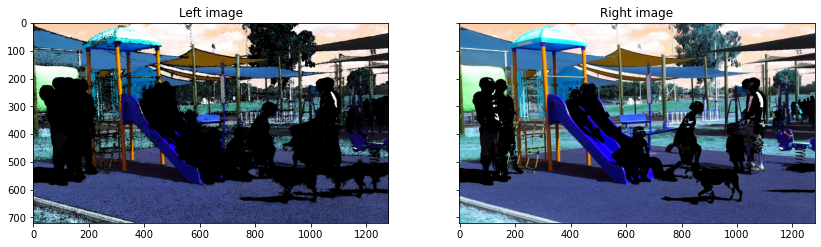

In [273]:
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(background_img, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(images_list[107], cmap='gray'), ax2.set_title('Right image')

4 % 2

np.linalg.norm(np.array([0, 0, 0])-np.array([5, 1, 1]))

**A2. Post Processing for  change detection**

**Answer:** Suggest a post processing algorithm for improving  the results of a change detection algorithm (e.g., remove noise or fill gaps). 

**Code:** implement your algorithm.

*Input:*  v_original, v_foreground\
v_original: the original video\
v_foreground: the output of B1

*output:* v_PP_foreground\
v_PP_foreground: the result of the post processing on v_foreground.


**Note:**
1. You may want to generate from v_foreground  a binary mask of the foreground regions.
2. You can use dilation or erosion on a the binary mask.
3.  You may use additional frames to improve the results, but you do not have to.


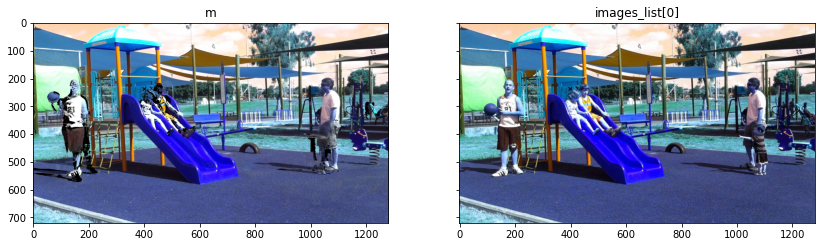

In [272]:
# removing noise using gaussian

def generate_binary_mask(v_foreground):
    
    #binary_mask = np.zeros_like(v_foreground[0])
    return get_background_img(v_foreground)
    

def improve_foreground(v_original,v_foreground):
    
    # your code
    
    for i, img in enumerate(v_foreground):
        
        v_foreground[i] = cv2.GaussianBlur(img,(5,5),0)
        v_foreground[i] = cv2.blur(img,(5,5))
    
    return v_PP_foreground


def get_min_img(images_list):
    '''
    Calculate the background_img by getting the median pixel
    from the sum's list of pixel in each k1 imgs
    
    way2 is to calculate the median img 
    '''
    background_img = np.zeros_like(images_list[0])
    count =0 
    
    for i in range(len(background_img)): # row
        for j in range(len(background_img[0])): # colomn
            
            colors_sum_list = [(ix, sum(img[i][j])) for ix, img in enumerate(images_list)]
            colors_sum_list.sort(key=lambda tup: tup[1])
            median_index = colors_sum_list[-1]
             
            try:
                background_img[i][j] = images_list[median_index[0]][i][j]
            except IndexError as Ie:
                print(colors_sum_list)
                print(colors_sum_list)
                print(median_index)   
                print(f'i: {i}, j:{j}')
                return

    return background_img

m = get_min_img(images_list[30:])
show_imgs(m, images_list[0], 'm', 'images_list[0]')

In [281]:
v = np.array(images_list)

print(v[0][0][0][1])
print(images_list[0][0][0][1])

v[0][0][0][1] = 50

print(v[0][0][0][1])
print(images_list[0][0][0][1])

print(type(images_list[0]))
print(type(images_list[0][0]))
print(type(images_list[0][0][0]))

2
2
50
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**A3. Counting  foreground objects**

Write a function that counts the number of foreground objects in the result of A1 or A2. 

*Input:* v_foreground\
v_foreground: a video which is the output of B1 or B2

*Output*: c\
c: a vector with the number of foreground objects in each of the frames

**Note:** You can use a function that counts connected components in a binary image.


In [ ]:
def c = count_foreground_objects(v_foreground):
    
    # your code
    
    return c

## Section B: Compute Optical Flow (OF) using Lucas-Kanade

**B1. Basic Lucas Kanade OF**

Impelment the basic Lucas-Kanade we leared in class.

*Input:*  name_file, nf1, nf2,  sigma_R, sigma_S\
name_file: a name of a video file\
f1 and f2: the numbers of the two frames form the video on which the OF is computed.\
sigma_S: the variance of the Gaussian used for the  spatial smoothing  as in HW1 (for computing the derivative of a Gaussian).\
sigma_R: the variance of the Gaussian for computing the sum of the derivatives (the convolution replace the sum).

*Output:* U, V, im1,im2\
U, V:  two matrices with the x and y motion for each pixel, respectively.\
im1, im2: the frames on which the optical flow was computed (their number in the video is nf1 and nf2).

**Note:**
1. You can use any video reading method you find convenient.
2. Do not forget to convert the images into grey scale.
3. You can compute the derivatives of the images as in HW1 - convolution with the derivative of a Gaussian.
3. You can resize the images in order for the program to run faster.
5. The computed OF is not necessarily integers. You may want to perform float computation.
6. For sigma_R look at slide 63 of Class 7.

In [8]:
def basic_LK_OF(name_file, nf1, nf2, sigma_S, sigma_R):
 
  # your code
    
    return U,V,im1,im2

SyntaxError: invalid syntax (<ipython-input-8-17765c199e6e>, line 1)

**B2. Present OF results**

*Input:* im1, U, V (the output of Basic_LK_OF without im2).

*Output:* a quiver plot overlaid the input  frame

**Note:**
1. You can look at https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html
2. You may want for visualaization to uniformally resize the values of U and V - if they are too large or too small/
2. You may not want to draw the OF  each pixel - to avoid OF overlapping of neighboring pixels.

In [ ]:
def OF_plot_results(U,V,im1):
    
    # your code

**B3. Evaluate OF results**

*Input:* im1, im2,  U, V (the output of Basic_LK_OF).

*Output:* w_im1, w_diff, err\
w_im1: the results of wrapping im1 using (U,V) toward im2 (matrix).\
w_diff:  |wraped_im1 -  im2| (matrix).\
err: the sum of square differences between w_im1 and im2 (scalar).

**Note:**\
 You can use any wrapping function you like from openCV or other code.


In [ ]:
def [w_im1, w_diff, err] = eval_OF(im1,im2,U,V):
    
    # your code

**B4. Affine_LK_OF**

Use the variant of Lucas-Kanade with affine motion instead of translation.
See slides - class 7 slides 73-75.

The input and output is the same as in **B1**.



In [ ]:
def [U,V,im1,im2] = affine_LK_OF(video, nf1, nf2, sigma_S, sigma_R):
 
  # your code

**B5. Apply and Discuss:**

Run the basic_LK_OF, and the affine_LK_OF on one or two videos, one with a static camera and the other with a moving camera.
Play with the frames chosen from each video, the algorithm parameters, and  the distance between nf1 and nf2.

**Answer:**
1. The disparity you compute in HW2 were integers while the OF is not necessarily integer. Expalin why. 
2. Explain theoretically for which regions the basic_LK_OF is expected to give good results and for which it does not.
2. Demonstrate your answer to (2) by displaying the results of OF overlaid im1  (Quiver overlayed im1), and mark good and bad results.
3. Explain theoretically when the basic_LK_OF is expected to fail while affine_LK_OF works well.
4. Find an example for (4)  (at least a region in the scene) and display it.
5. When two OF vectors have the same magnitude, are they necessarily corresponds to 3D points that moves at the same speed?


## Section C: Segementation  -- Not for submission

Part C will not be graded, hence,  **you do not have to submit it**. In case you would like to get feedback on it anyway - you are welcome to submit it.

**C1. Simple OF segemntation**

Use a simple segmentation (e.g., threshold) for the OF results based on the OF magnitude.

*Input:* U, V, any other parameters you find necessary
U, V - the OF vectors (e.g., computed by  B1 or B4).

*Output:* segments
im_segments is an image in which each segment is colored by a different color.


In [ ]:
def im_segments = simple_segment_OF(U,V, "any other paramers")
   
    # Your code

**C2. K-means OF segemntation**

Use k-mean segmentation for the OF results based on the OF magnitude and directions.

*Input:* U, V, any other parameters you find necessary\
U, V - the OF vectors (e.g., computed by  B1 or B4).

*Output:* im_segments\
im_segments is an image in which each segment is colored by a different color.

In [ ]:
def im_segments = simple_segment_OF(U,V, "any other paramers")
   
    # Your code

**C3. Apply  and answer**

1. Apply the functions in C1 and C2 on a video of your choice with a moving camera.
2. Discuss which method (C1 or C2) works better. Give an example.


**C4. OF used for change detection**

Assume that the video is taken by a static camera and use the results of C1 or C2 on the output in order to detect moving regions in the scene.

*input:* name_file, nf1, "any parameters you need"\
name_file: a name of a video file.\
nf1: the frame on which the OF is computed (nf1 and nf1+1).

*output*: v_change\
v_foreground: as in A1



In [ ]:




    
    # your code

**C5. Change detection comparisons**

Choose a video taken from a static camera (one of the videos you used for change detection). 

1. Apply the functions A1 or A2 and C4.
4. Discuss which method (A1 or C4) works better. Give an example.
5. Count the number of moving regions for A1, A3, and C4. 